# Checkpoint 1
## (Do not remove any comments that start with"# @@@".)

Reminder:

- You are being evaluated for completion and effort in this checkpoint.
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@".

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [ ]:
filename = 'data/states_edu.csv'
df = pd.read_csv(filename)
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [47]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ALL_ENROLLED_COUNT',
    'ENROLL':'ALL_ENROLLED_FINANCIAL'
    },
    axis=1,inplace=True)

In [48]:
df.dropna()

,PRIMARY_KEY,STATE,YEAR,ALL_ENROLLED_FINANCIAL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ALL_ENROLLED_COUNT,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


In [49]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ALL_ENROLLED_FINANCIAL',
       'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ALL_ENROLLED_COUNT', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [50]:
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *I chose Grade 8 Math*

How many years of data are logged in our dataset?

In [51]:
# @@@ 1
# Your Code

years = df['YEAR'].unique()
print(years)

[1992 2000 2003 2005 2007 2009 2011 2013 2015 1990 2017 1996 2019]


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [52]:
# @@@ 2
df.groupby(['STATE'])['AVG_MATH_8_SCORE'].mean()
# Michigan has avg of 276.167
# Ohio has avg of 282.250


,AVG_MATH_8_SCORE
STATE,
ALABAMA,264.166667
ALASKA,280.000000
ARIZONA,274.666667
ARKANSAS,269.750000
CALIFORNIA,269.166667
COLORADO,283.181818
CONNECTICUT,282.250000
DELAWARE,277.181818
DISTRICT_OF_COLUMBIA,251.166667


Find the average for your chosen test across all states in 2019

In [53]:
# @@@ 3
a = df.groupby(['STATE'])['AVG_MATH_8_SCORE'].mean()
import statistics
statistics.mean(a)

278.5171248039173

For each state, find a maximum value for your chosen test score

In [54]:
# @@@ 4
df.groupby(['STATE'])['AVG_MATH_8_SCORE'].max()

,AVG_MATH_8_SCORE
STATE,
ALABAMA,269.0
ALASKA,283.0
ARIZONA,283.0
ARKANSAS,279.0
CALIFORNIA,277.0
COLORADO,292.0
CONNECTICUT,289.0
DELAWARE,284.0
DISTRICT_OF_COLUMBIA,269.0


*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [55]:
#just doing extra stuff to the data
df.isna().sum()

,0
PRIMARY_KEY,0
STATE,0
YEAR,0
ALL_ENROLLED_FINANCIAL,205
TOTAL_REVENUE,163
FEDERAL_REVENUE,163
STATE_REVENUE,163
LOCAL_REVENUE,163
TOTAL_EXPENDITURE,163
INSTRUCTION_EXPENDITURE,163


In [58]:
df["ALL_ENROLLED_FINANCIAL"] = df["ALL_ENROLLED_FINANCIAL"].fillna(df["ALL_ENROLLED_COUNT"])

In [59]:
df.isna().sum()

,0
PRIMARY_KEY,0
STATE,0
YEAR,0
ALL_ENROLLED_FINANCIAL,74
TOTAL_REVENUE,163
FEDERAL_REVENUE,163
STATE_REVENUE,163
LOCAL_REVENUE,163
TOTAL_EXPENDITURE,163
INSTRUCTION_EXPENDITURE,163


<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable.

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [69]:
# @@@ 5
df['TOTAL EXPENDITURE PER STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ALL_ENROLLED_COUNT']
df['INSTRUCTION EXPENDITURE PER STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ALL_ENROLLED_COUNT']
df['SUPPORT SERVICES EXPENDITURE PER STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ALL_ENROLLED_COUNT']

df.head()

,PRIMARY_KEY,STATE,YEAR,ALL_ENROLLED_FINANCIAL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_PRIMARY,ENROLL_HS,ALL_ENROLLED_COUNT,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,TOTAL EXPENDITURE PER STUDENT,INSTRUCTION EXPENDITURE PER STUDENT,SUPPORT SERVICES EXPENDITURE PER STUDENT
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,3.627221,2.025197,1.004650
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,5.050774,2.132082,1.496312
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,3.948044,2.184247,1.095128
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,5.164536,2.732512,1.621537
5,1992_COLORADO,COLORADO,1992,612635.0,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,5.329154,2.680986,1.691007


Feature engineering justification: to see how much money actually goes to each student

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

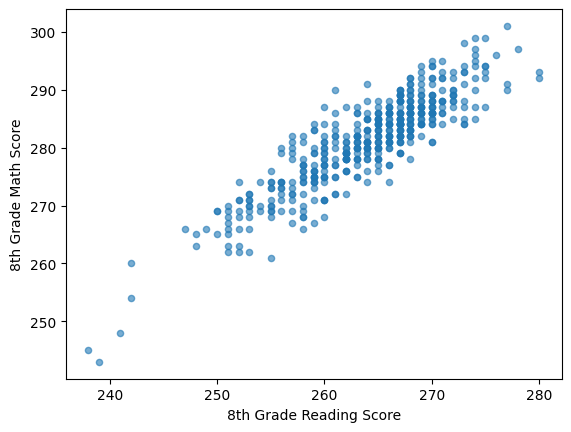

In [70]:
# @@@ 6
#to see if students good at Reading are also good at Math
df.plot.scatter(x='AVG_READING_8_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('8th Grade Reading Score')
plt.ylabel('8th Grade Math Score')

**<If Reading and Mathematics correlated? Yes they are>**

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

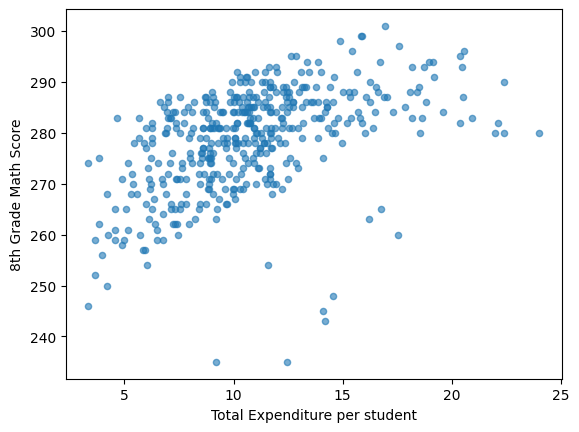

In [74]:
# @@@ 7
df.plot.scatter(x='TOTAL EXPENDITURE PER STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Total Expenditure per student')
plt.ylabel('8th Grade Math Score')

This isn't too correlated but I see it slightly correlates

Text(0, 0.5, '8th Grade Math Score')

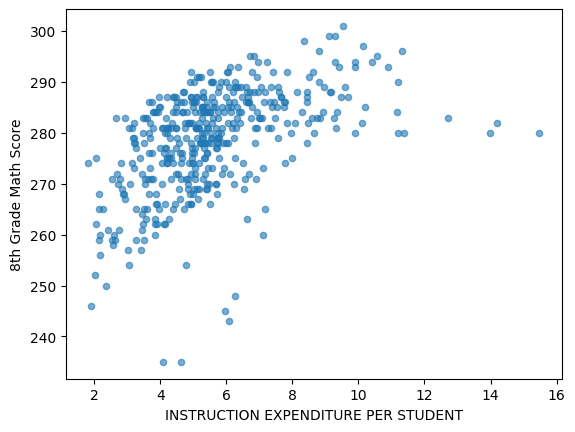

In [76]:
df.plot.scatter(x='INSTRUCTION EXPENDITURE PER STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('INSTRUCTION EXPENDITURE PER STUDENT')
plt.ylabel('8th Grade Math Score')

Since Total and Instruction expenditure are linear correlated, the instruction expenditure chart is only compressed

Text(0, 0.5, '8th Grade Math Score')

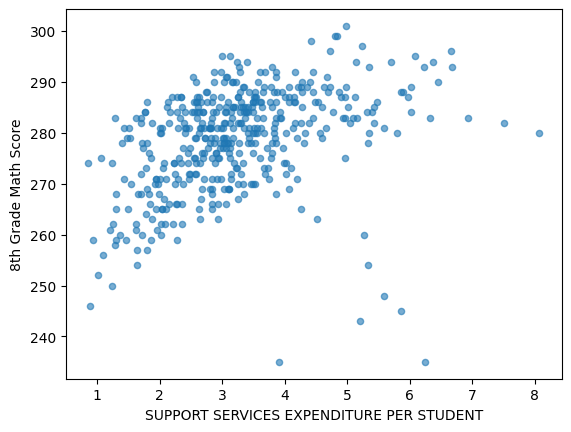

In [77]:
df.plot.scatter(x='SUPPORT SERVICES EXPENDITURE PER STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('SUPPORT SERVICES EXPENDITURE PER STUDENT')
plt.ylabel('8th Grade Math Score')

Text(0, 0.5, '8th Grade Math Score')

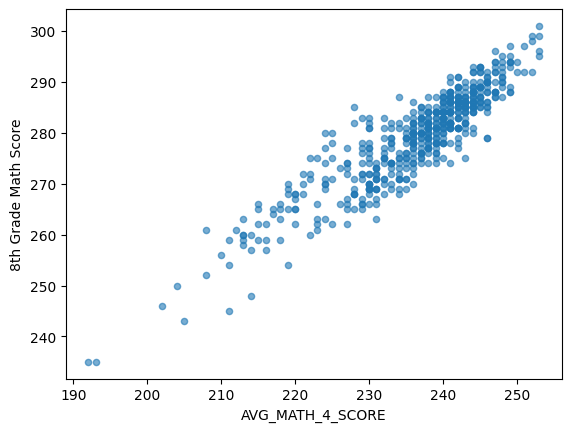

In [78]:
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('AVG_MATH_4_SCORE')
plt.ylabel('8th Grade Math Score')

<Axes: >

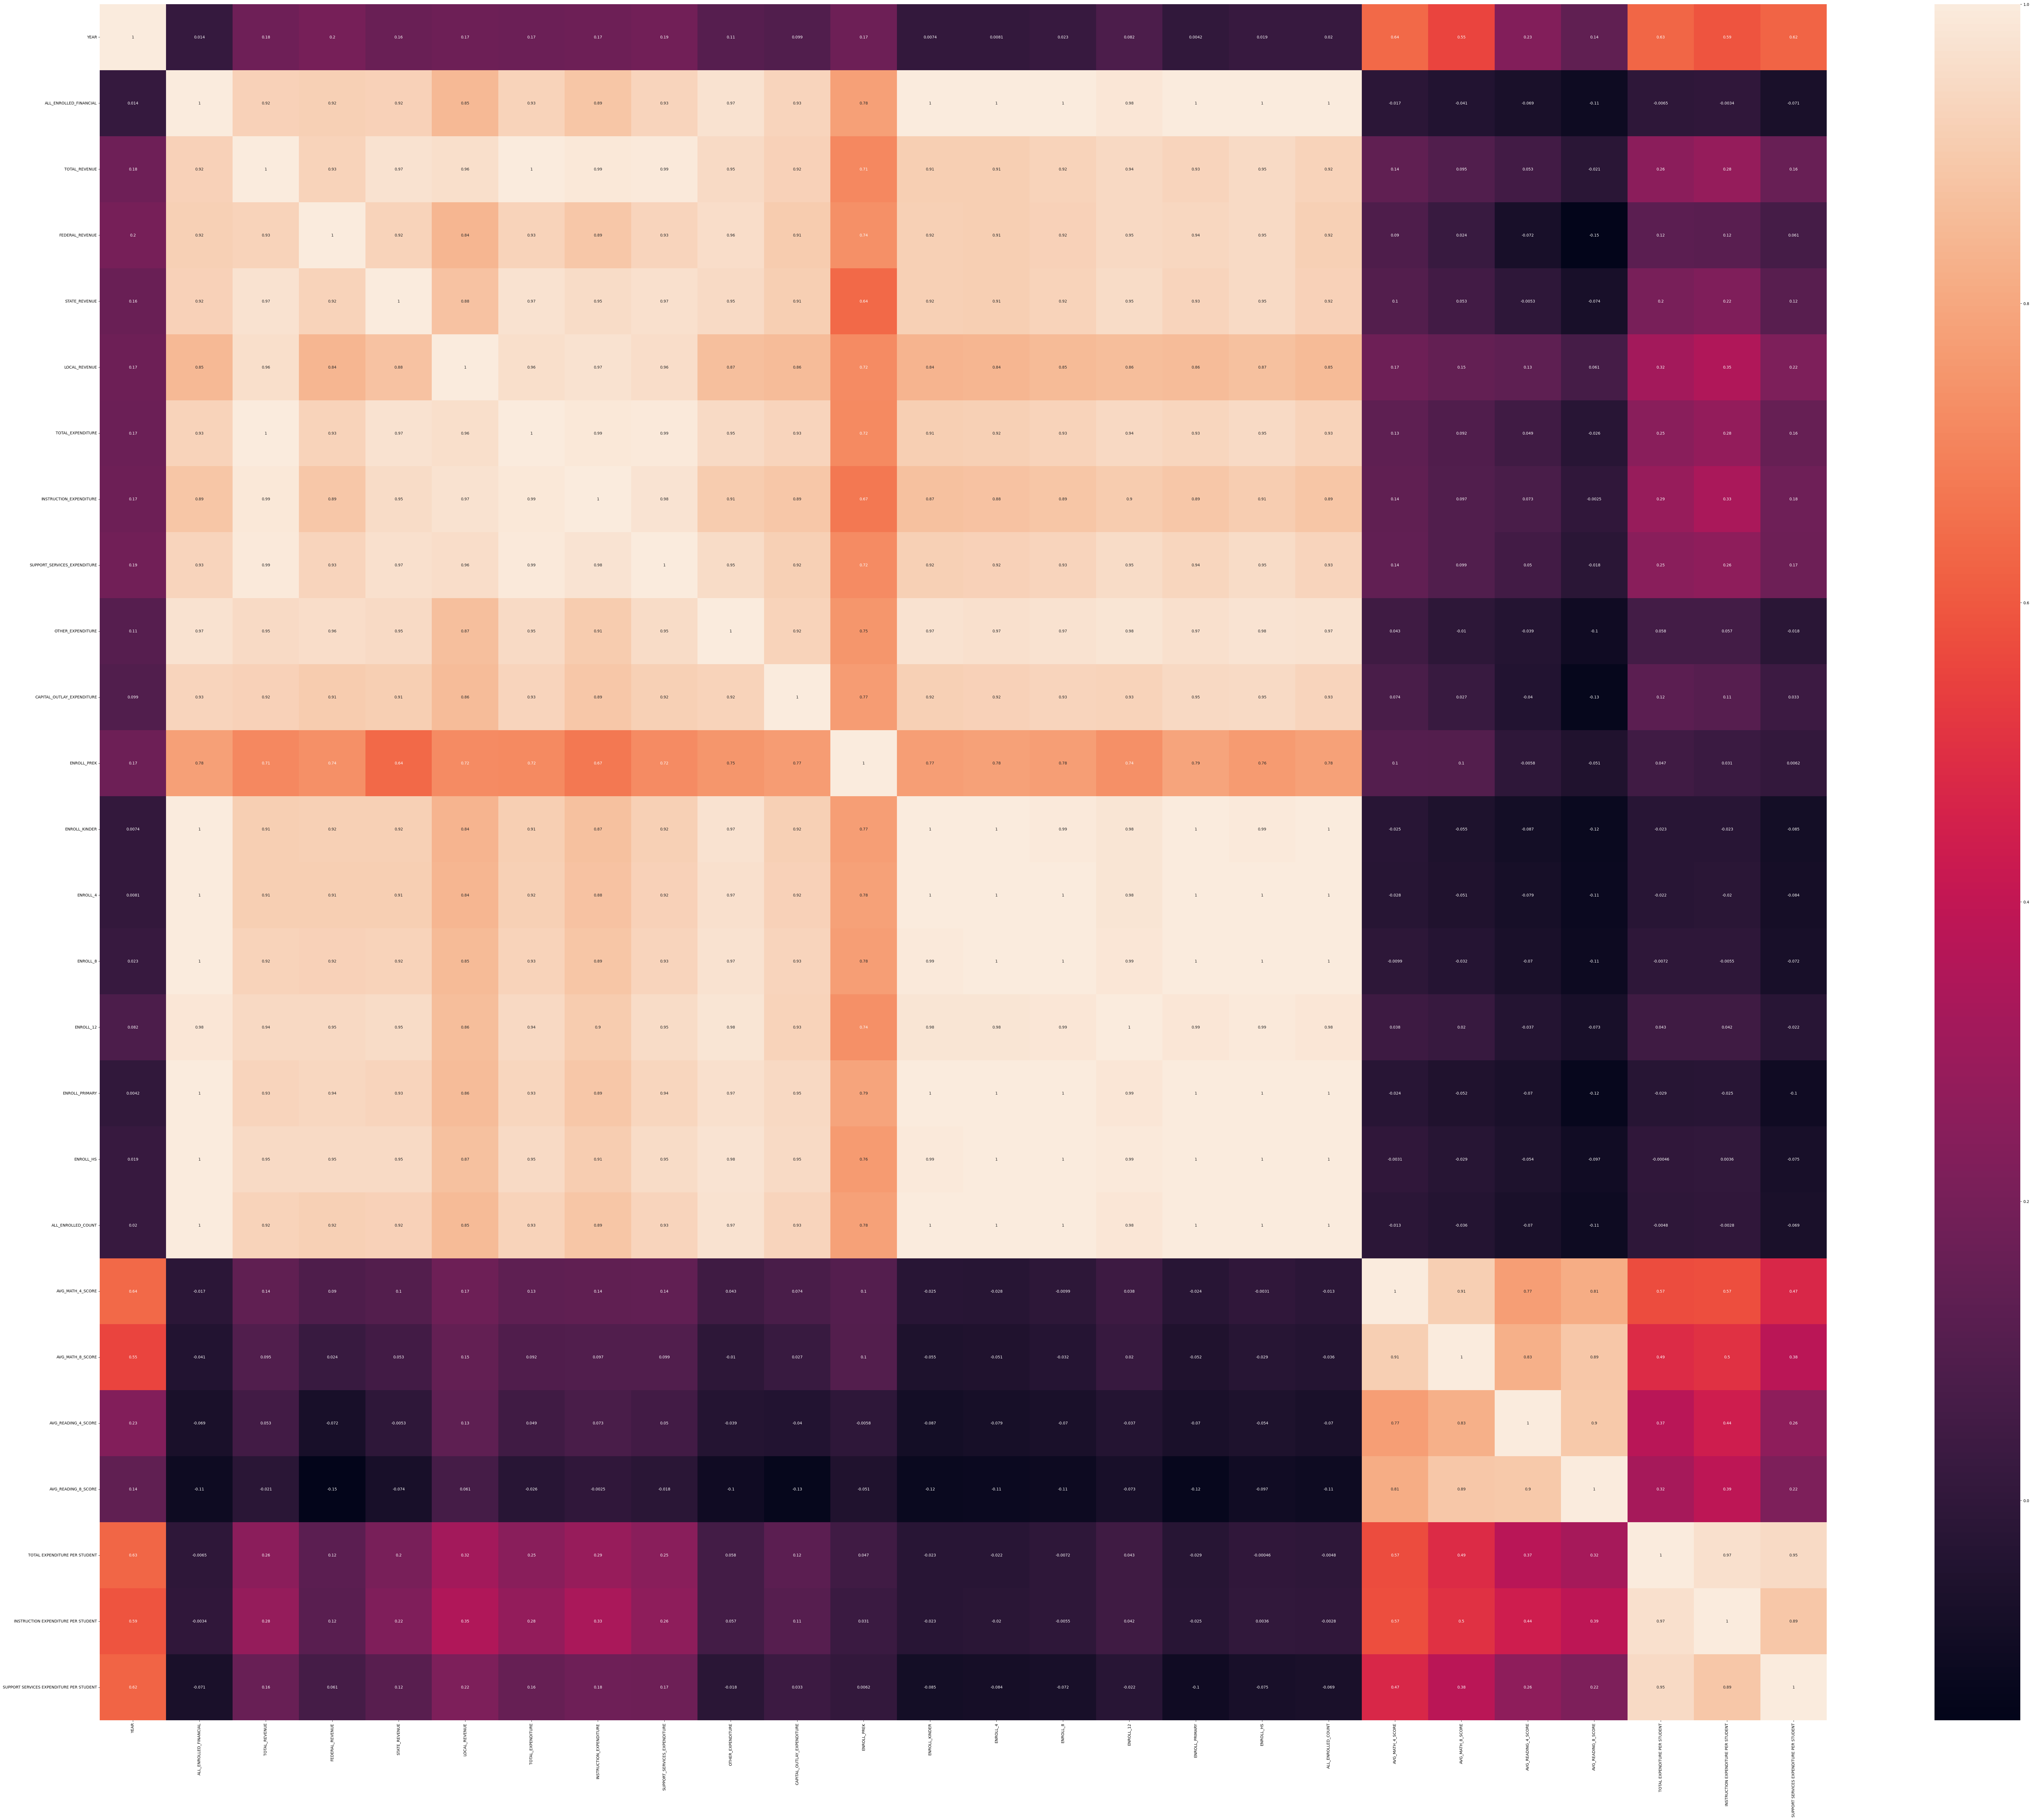

In [92]:
#correlation matrix
import seaborn as sns
corr_df = df.iloc[:, 2:]
corr_df.head()
corr_mat = corr_df.corr()
plt.figure(figsize=(100, 80))
sns.heatmap(corr_mat, annot=True)


based on heatmap, only AVG_READING_8_SCORE, AVG_READING_4_SCORE, and AVG_MATH_4_SCORE has a correlation above 0.8. So I'm going to select these 3 features.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [93]:
from sklearn.model_selection import train_test_split

In [96]:
# @@@ 8

X = df[['AVG_MATH_4_SCORE','AVG_READING_8_SCORE','AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']
print(X.shape)
print(y.shape)

(478, 3)
(478,)


In [103]:
for i in range(len(y)):
  print(y.iloc[i])

262.0
279.0
271.0
266.0
267.0
283.0
284.0
277.0
243.0
271.0
270.0
266.0
280.0
277.0
281.0
284.0
284.0
274.0
266.0
282.0
278.0
287.0
276.0
291.0
261.0
279.0
286.0
282.0
268.0
286.0
281.0
263.0
280.0
281.0
287.0
282.0
272.0
281.0
279.0
272.0
277.0
285.0
268.0
277.0
281.0
286.0
282.0
281.0
271.0
284.0
284.0
262.0
279.0
274.0
272.0
269.0
281.0
281.0
281.0
245.0
274.0
272.0
266.0
281.0
278.0
282.0
284.0
284.0
274.0
268.0
281.0
278.0
292.0
277.0
290.0
262.0
276.0
286.0
284.0
270.0
285.0
284.0
263.0
280.0
282.0
287.0
283.0
271.0
282.0
281.0
272.0
281.0
287.0
271.0
281.0
279.0
287.0
284.0
285.0
269.0
285.0
282.0
266.0
283.0
276.0
274.0
270.0
286.0
282.0
283.0
248.0
277.0
275.0
269.0
284.0
280.0
285.0
285.0
290.0
279.0
272.0
286.0
286.0
298.0
277.0
292.0
265.0
281.0
287.0
284.0
271.0
288.0
289.0
268.0
280.0
284.0
292.0
285.0
275.0
284.0
286.0
275.0
282.0
288.0
274.0
286.0
281.0
291.0
288.0
285.0
270.0
286.0
287.0
269.0
283.0
277.0
276.0
270.0
287.0
289.0
284.0
254.0
279.0
278.0
274.0
287.0
282.

In [97]:
# @@@ 9

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [104]:
# @@@ 10
# import your sklearn class here
#already imported above

In [105]:
# @@@ 11
# create your model here
model = LinearRegression()

In [106]:
model.fit(X_train, y_train)

LinearRegression()

In [107]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [108]:
# @@@ 12
model.score(X_test, y_test)

0.9087506555146471

We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

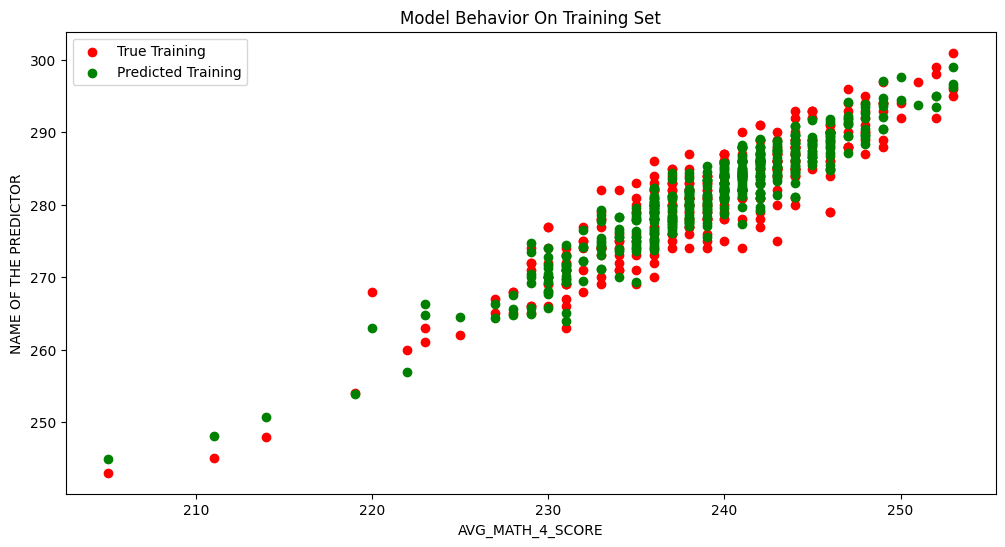

In [109]:
# @@@ 13

col_name = 'AVG_MATH_4_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

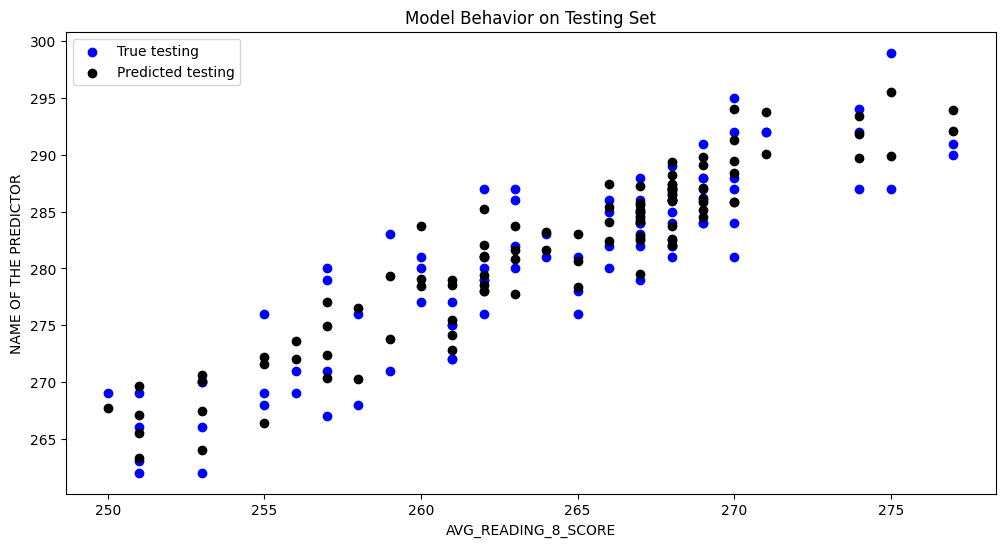

In [110]:
# @@@ 14


col_name = 'AVG_READING_8_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

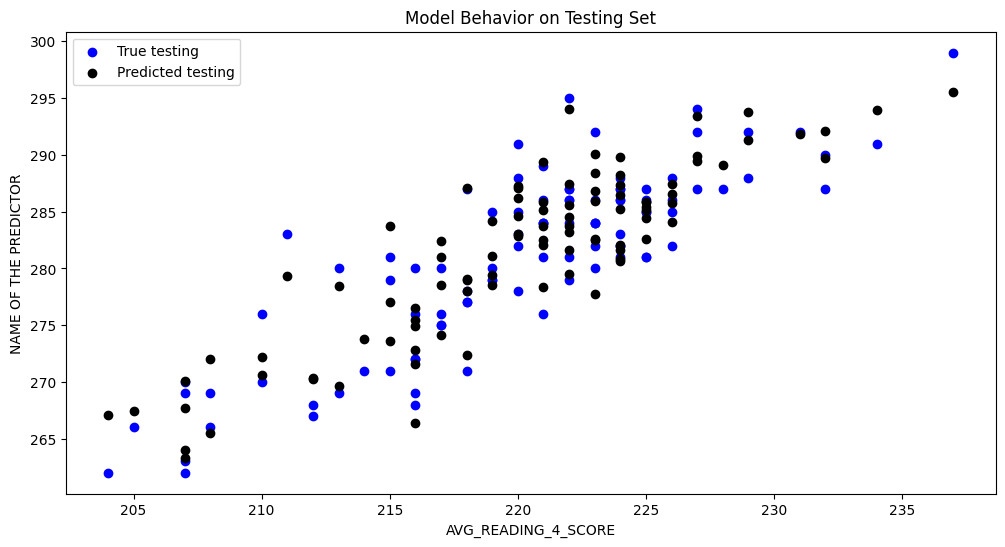

In [111]:
col_name = 'AVG_READING_4_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")